In [ ]:
1. linear regression: Relationship that stats how 2 variables are linearly changing. 
    
2. it helps us to predict an outcome(target var, dependent var- 1 dev in the model) using independent variables(predictors)
    
3. supervised learning: DV given history...
   unsupervised learning: DV not given...

4. Simple LR----Equation--    Y=mX+c or Y=b1x1+incercept

  Multiple.L.R------line  -----  Y= b1x1+b2x2+b3x3+...+intercept
                                
    
Betas-- weight of variable 
intercept-- By default value of salary(DV) when x is not given...


5. Linear regression aims at finding a best best fit line that minimizes the difference between actual DV and predicted var


----- Assumptions of linear regression:
    
    
1. there should be linear relationship between DV and IV's
2. the IV's should be non correlated...
3. (actual-predicted)= error...residual...
--3.1  -- residuals should be normally distributed...QQ plot....
--3.2 --- residuals should not have any autocorelation...
          identify AC- dublin watson( DW test)- 1.5-2.5....there is no autocorrelation, 
          <1.5--- +autocorrelation
          >2.5---- -ve autocorelation
            
          issue- coefficients bias...those will not be the correct betas....
        
        
4. sum of residuals should be close to 0 and avg of residuals should be constant    
5. variance of errors should be constant to----homoscadascity--
  for predicted values....errors should have constant variance...100, 100, 2% error...10%..2%
  --- heteroscadascity
   issue---- coefficients bias...those will not be the correct betas....

    

Project- 1 linear regression...

Business Goal:
    
    
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there
and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. 
Specifically, they want to understand the factors affecting the pricing of cars in the American market,
since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car?
How well those variables describe the price of a car?
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars 
across the America market.

DV?--- price
what should be the IV's?-- color, manufacture, maker, model, HP, mpg, cyli, ..... 
History data--- existing US market cars data is our history data...
objective?----- to predict price of cars in a new market




We will cover the following linear algorithms:

Linear Regression-- DV?--- price-- continuous....Lin REg

OLS- ordinary least square reg

LSR- least sqruare reg


actual                       predicted price
price    mpg     hp   cyl
100      10       8     2    Y=incercept+b1*mpg+b2*hp+b3*cyl= 20+11*3+7*4+4*10=121
120      11       7     4    121
200       8       12    6


new cars
?       12       10     4

Y=20+11*12+7*10+10*4= 262


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing sklearn libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#importing statsmodel api module
import statsmodels.api as sm

In [2]:
############################ Phase 1: Importing/loading/Reading dataset:

df=pd.read_csv("C:\\Users\\dh207150\\Desktop\\Car_price.csv")

In [4]:
df.shape

(205, 26)

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
########################################### Phase 2- Data exploration:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
#Checking the Null Values %age:

round(((df.isna().sum() / df.shape[0]) * 100),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [19]:
########## Now analysisng the numericals columns

int_vars=df.select_dtypes(exclude="object")

In [22]:
# Remove irrelant var:
nvars=int_vars.drop(labels=["car_ID","symboling","doornumber","cylindernumber"],axis=1)

In [24]:
nvars.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
################################################### phase 3- Data Preparation:

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' 
and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' 
as the car model name.You should consider only company name as the independent variable for model building.

In [9]:
#Splitting the CarName COlumn

df.CarName=df.CarName.apply(lambda x:x.split(" ")[0])

In [10]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
#We have seen that few of the CarName are misspelled, so correcting them:

df.CarName.replace({"maxda":"mazda","vokswagen":"volkswagen","vw":"volkswagen","Nissan":"nissan","porcshce":"porsche","toyouta":"toyota"},inplace=True)

In [13]:
############ converting text ordinal variables to numerical ordinal:

df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [14]:
#mapping the door number from object to numerical
df.doornumber=df.doornumber.replace({"two":2,"four":4}).astype(np.int64)

In [15]:
#Checking the cylindernumber columns:

df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [18]:
#mapping the object columns to numericals
df.cylindernumber=df.cylindernumber.map({"four":4,"six":6,"five":5,"three":3,"twelve":12,"two":2,"eight":8}).astype(np.int64)

In [ ]:
#####################################################################

In [26]:
#handling categorical var- one hot encoding- qualitative to quant var creation-- GETTING DUMMIES
dummy_vars=["fueltype","aspiration","carbody","drivewheel","enginelocation","enginetype","fuelsystem"]
dummies=pd.get_dummies(data=df[dummy_vars],drop_first=True)

In [ ]:
### you need to remove lowest category not the first ...

In [27]:
#final_df=pd.concat([df,dummies],axis=1)Lets see how data looks now:

final_df=pd.concat([df,dummies],axis=1)   


In [29]:
final_df.columns,df.shape

(Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
        'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
        'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
        'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
        'price', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
        'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
        'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
        'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
        'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
        'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
        'fuelsystem_spdi', 'fuelsystem_spfi'],
       dtype='object'),
 (205, 26))

In [43]:
##################### phase 4- Feature reduction/variable selection:

# Remove columns that are of no use to us:

final_df.drop(labels=["car_ID","CarName","fueltype","aspiration","carbody","drivewheel","enginelocation",
                "enginetype","fuelsystem"],axis=1,inplace=True)

In [44]:
final_df.shape

(205, 39)

In [46]:
# near zero var

df1=final_df.var()
print(df1)

df1.to_csv("var_car_df_new.csv")

import os
os.getcwd()

symboling              1.550789e+00
doornumber             9.899570e-01
wheelbase              3.626178e+01
carlength              1.522087e+02
carwidth               4.601900e+00
carheight              5.970800e+00
curbweight             2.711079e+05
cylindernumber         1.168245e+00
enginesize             1.734114e+03
boreratio              7.335631e-02
stroke                 9.834309e-02
compressionratio       1.577710e+01
horsepower             1.563741e+03
peakrpm                2.275153e+05
citympg                4.279962e+01
highwaympg             4.742310e+01
price                  6.382176e+07
fueltype_gas           8.847441e-02
aspiration_turbo       1.486370e-01
carbody_hardtop        3.768532e-02
carbody_hatchback      2.259684e-01
carbody_sedan          2.502152e-01
carbody_wagon          1.076040e-01
drivewheel_fwd         2.439024e-01
drivewheel_rwd         2.344333e-01
enginelocation_rear    1.449067e-02
enginetype_dohcv       4.878049e-03
enginetype_l           5.538

'C:\\Users\\dh207150'

In [47]:
# remove low var variables


final_df.drop(['stroke',
'fueltype_gas',
'fuelsystem_idi',
'boreratio',
'enginetype_ohcf',
'enginetype_ohcv',
'enginetype_l',
'fuelsystem_spdi',
'carbody_hardtop',
'enginetype_rotor',
'enginelocation_rear',
'fuelsystem_4bbl',
'enginetype_dohcv',
'fuelsystem_mfi',
'fuelsystem_spfi'],axis=1,inplace=True)

final_df.shape

(205, 24)

In [ ]:
# correlation

In [50]:
corr_car=final_df.corr()

In [52]:
corr_car.to_csv("corr_car_df.csv")

In [57]:
final_df.drop(['carwidth',
'curbweight',
'horsepower',
'highwaympg'],axis=1,inplace=True)

KeyError: "['carwidth' 'curbweight' 'horsepower' 'highwaympg'] not found in axis"

In [59]:
final_df.shape

(205, 20)

In [64]:
corr_car_2=final_df.corr()

In [65]:
corr_car_2.to_csv("corr_car_df_2.csv")

In [66]:
final_df.drop(['carlength',
'enginesize',
'doornumber',
'fuelsystem_mpfi',
'carbody_sedan',
'drivewheel_rwd'],axis=1,inplace=True)

In [70]:
final_df.shape

(205, 14)

In [ ]:
####################################### we are done with feature selection ####################

In [ ]:
#Train_test_split

In [72]:
#SPLITTING THE DATASET

#importing sklearn libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#importing statsmodel api module
import statsmodels.api as sm




In [83]:
df_train,df_test=train_test_split(final_df,test_size=0.3,random_state=42)

In [84]:
# scaling the data
scale=MinMaxScaler()

In [85]:
df_train.columns

Index(['symboling', 'wheelbase', 'carheight', 'cylindernumber',
       'compressionratio', 'peakrpm', 'citympg', 'price', 'aspiration_turbo',
       'carbody_hatchback', 'carbody_wagon', 'drivewheel_fwd',
       'enginetype_ohc', 'fuelsystem_2bbl'],
      dtype='object')

In [86]:
cols=['symboling', 'wheelbase', 'carheight', 'cylindernumber',
       'compressionratio', 'peakrpm', 'citympg', 'price', 'aspiration_turbo',
       'carbody_hatchback', 'carbody_wagon', 'drivewheel_fwd',
       'enginetype_ohc', 'fuelsystem_2bbl']

In [87]:
df_train[cols]=scale.fit_transform(df_train[cols])

<ipython-input-87-6f3ef73130e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[cols]=scale.fit_transform(df_train[cols])
C:\Users\dh207150\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [90]:
df_train.head()

,symboling,wheelbase,carheight,cylindernumber,compressionratio,peakrpm,citympg,price,aspiration_turbo,carbody_hatchback,carbody_wagon,drivewheel_fwd,enginetype_ohc,fuelsystem_2bbl
177,0.2,0.544828,0.508333,0.2,0.10625,0.020408,0.56,0.152177,0.0,1.0,0.0,1.0,1.0,0.0
75,0.6,0.555172,0.583333,0.2,0.06250,0.346939,0.24,0.282632,1.0,1.0,0.0,0.0,1.0,0.0
174,0.2,0.544828,0.591667,0.2,0.96875,0.142857,0.68,0.138523,1.0,0.0,0.0,1.0,1.0,0.0
31,0.8,0.000000,0.250000,0.2,0.13750,0.755102,0.72,0.043121,0.0,1.0,0.0,1.0,1.0,0.0
12,0.4,0.503448,0.541667,0.4,0.12500,0.040816,0.32,0.393526,0.0,0.0,0.0,0.0,1.0,0.0


In [91]:
# creating independent variables of training data
X_train=df_train.drop(["price"],axis=1)

In [92]:
# creating dependent variable of training data
y_train=df_train.pop("price")

In [94]:
y_train.shape,X_train.shape

((143,), (143, 13))

In [96]:
#Making the model using statsmodel (sm)
X_train_1=sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_1).fit()
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     49.74
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           8.57e-44
Time:                        01:06:20   Log-Likelihood:                 160.00
No. Observations:                 143   AIC:                            -292.0
Df Residuals:                     129   BIC:                            -250.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0222      0.076     -0.293      0.770      -0.172       0.128
symboling             0.1093      0.041      2.697      0.008       0.029       0.189
wheelbase             0.2477      0.063      3.909      0.000       0.122       0.373
carheight             0.0115      0.054      0.214      0.831      -0.095       0.118
cylindernumber        0.7657      0.080      9.535      0.000       0.607       0.925
compressionratio      0.1148      0.048      2.394      0.018       0.020       0.210
peakrpm               0.0843      0.045      1.872      0.064      -0.005       0.174
citympg              -0.3257      0.064     -5.082      0.000      -0.453      -0.199
aspiration_turbo      0.0090      0.021      0.421      0.674      -0.033       0.051
carbody_hatchback    -0.0385      0.018     -2.179      0.031      -0.074      -0.004
carbody_wagon        -0.0778      0.026     -2.989      0.003      -0.129      -0.026
drivewheel_fwd       -0.0648      0.020     -3.257      0.001      -0.104      -0.025
enginetype_ohc        0.0303      0.020      1.539      0.126      -0.009       0.069
fuelsystem_2bbl       0.0134      0.023      0.595      0.553      -0.031       0.058
==============================================================================
Omnibus:                       15.002   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.066
Skew:                           0.545   Prob(JB):                     9.80e-06
Kurtosis:                       4.639   Cond. No.                         30.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
X_train_ite1=X_train.drop(["carheight",'aspiration_turbo','fuelsystem_2bbl','enginetype_ohc'],axis=1)

In [104]:
X_train_2=sm.add_constant(X_train_ite1)
lm_1 = sm.OLS(y_train,X_train_2).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     72.20
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           7.84e-47
Time:                        01:13:24   Log-Likelihood:                 158.47
No. Observations:                 143   AIC:                            -296.9
Df Residuals:                     133   BIC:                            -267.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0170      0.068      0.249      0.804      -0.118       0.152
symboling             0.0973      0.040      2.462      0.015       0.019       0.175
wheelbase             0.2519      0.056      4.470      0.000       0.140       0.363
cylindernumber        0.7297      0.073     10.060      0.000       0.586       0.873
compressionratio      0.1026      0.039      2.621      0.010       0.025       0.180
peakrpm               0.0717      0.041      1.748      0.083      -0.009       0.153
citympg              -0.3058      0.054     -5.677      0.000      -0.412      -0.199
carbody_hatchback    -0.0389      0.017     -2.306      0.023      -0.072      -0.006
carbody_wagon        -0.0820      0.024     -3.474      0.001      -0.129      -0.035
drivewheel_fwd       -0.0537      0.019     -2.904      0.004      -0.090      -0.017
==============================================================================
Omnibus:                       13.183   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.314
Skew:                           0.456   Prob(JB):                     2.35e-05
Kurtosis:                       4.657   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
vif = pd.DataFrame()
X=X_train_2.drop("const",axis=1)
vif['featues'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,featues,VIF
5,citympg,8.26
0,symboling,6.86
4,peakrpm,5.86
1,wheelbase,5.70
2,cylindernumber,5.69
8,drivewheel_fwd,4.14
3,compressionratio,2.71
6,carbody_hatchback,1.95
7,carbody_wagon,1.33


In [115]:
X_train_2=X_train_2.drop("const",axis=1)
X_train_4=sm.add_constant(X_train_2)
lm4 = sm.OLS(y_train,X_train_4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     72.20
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           7.84e-47
Time:                        01:22:54   Log-Likelihood:                 158.47
No. Observations:                 143   AIC:                            -296.9
Df Residuals:                     133   BIC:                            -267.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0170      0.068      0.249      0.804      -0.118       0.152
symboling             0.0973      0.040      2.462      0.015       0.019       0.175
wheelbase             0.2519      0.056      4.470      0.000       0.140       0.363
cylindernumber        0.7297      0.073     10.060      0.000       0.586       0.873
compressionratio      0.1026      0.039      2.621      0.010       0.025       0.180
peakrpm               0.0717      0.041      1.748      0.083      -0.009       0.153
citympg              -0.3058      0.054     -5.677      0.000      -0.412      -0.199
carbody_hatchback    -0.0389      0.017     -2.306      0.023      -0.072      -0.006
carbody_wagon        -0.0820      0.024     -3.474      0.001      -0.129      -0.035
drivewheel_fwd       -0.0537      0.019     -2.904      0.004      -0.090      -0.017
==============================================================================
Omnibus:                       13.183   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.314
Skew:                           0.456   Prob(JB):                     2.35e-05
Kurtosis:                       4.657   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
##  VIF , P-values and R2 score looks significant so we can say that this is our final model 
## built and we have our best 8-9 variables that are helping us in predicting.

In [ ]:
# model validation:

In [117]:
X_train_2.columns

Index(['symboling', 'wheelbase', 'cylindernumber', 'compressionratio',
       'peakrpm', 'citympg', 'carbody_hatchback', 'carbody_wagon',
       'drivewheel_fwd'],
      dtype='object')

In [118]:
y_train_pred=lm4.predict(X_train_4)

0.8301001588540853

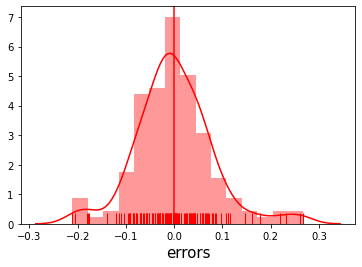

In [120]:
import seaborn as sb
res = y_train - y_train_pred
plt.axvline(x=0,color="red")

#distribution plot of error terms-
plt.xlabel("errors",fontsize=15)
sb.distplot(res,rug=True,color='red')
r2_score (y_train, y_train_pred)

In [121]:
# test data:

df_test[cols]=scale.transform(df_test[cols])

<ipython-input-121-1a7b0563f93e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[cols]=scale.transform(df_test[cols])
C:\Users\dh207150\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [122]:
# final model var
var=['symboling', 'wheelbase', 'cylindernumber', 'compressionratio',
       'peakrpm', 'citympg', 'carbody_hatchback', 'carbody_wagon',
       'drivewheel_fwd']

In [127]:
# test on shorlisted var:

f_test_var=df_test[var]

In [128]:
f_test_var.shape

(62, 9)

In [130]:
df_test_var=sm.add_constant(f_test_var)

In [131]:
y_test=df_test.pop("price")
X_test_var=df_test_var

In [134]:
y_test.shape,X_test_var.columns

((62,),
 Index(['const', 'symboling', 'wheelbase', 'cylindernumber', 'compressionratio',
        'peakrpm', 'citympg', 'carbody_hatchback', 'carbody_wagon',
        'drivewheel_fwd'],
       dtype='object'))

In [135]:
y_test_pred=lm4.predict(X_test_var)

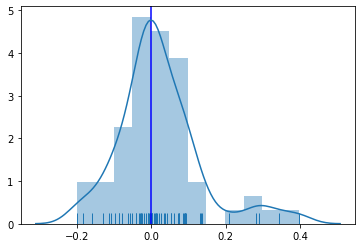

In [136]:
res2 = y_test-y_test_pred
plt.axvline(x=0,color="blue")
sb.distplot(res2,rug=True)

In [137]:
#R2 score of the test data
r2_score (y_test, y_test_pred)

0.6950268810547456

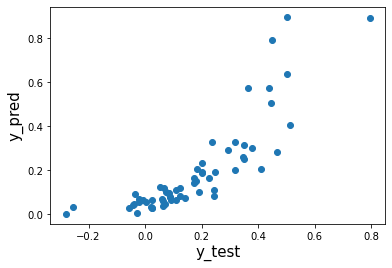

In [138]:
#ploting the y_test and Y-pred values
plt.xlabel("y_test",fontsize=15)
plt.ylabel("y_pred",fontsize=15)
plt.scatter(y_test_pred,y_test)